In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
#import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import PIL
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy import ndimage
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout





import scipy.ndimage as ndimage



In [ ]:
os.getcwd()

'/content'

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/kvasir-dataset-v2/'

In [ ]:
train_dataset = image_dataset_from_directory(
   base_dir,
    validation_split=0.2,  # Split the data into training and validation sets
    subset="training",
    seed=123,  # For reproducibility
    image_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32  # Load 32 images per batch
)

Found 8030 files belonging to 8 classes.
Using 6424 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,  # Split the data into training and validation sets
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

Found 8030 files belonging to 8 classes.
Using 1606 files for validation.


In [ ]:
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# Define image dimensions and path to the data
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3
NUM_CLASSES = 8  # Adjust for your number of classes (e.g., 8 classes for Kvasir)

In [ ]:
# U-Net Architecture for Classification (modified)
def unet_classification(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES):
    inputs = Input(input_shape)

    # Encoder (Contracting path)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Expanding path)
    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = Concatenate()([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = Concatenate()([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Global Average Pooling to convert feature map into a vector
    gap = GlobalAveragePooling2D()(c9)

    # Fully connected layer for classification
    dropout = Dropout(0.2)(gap)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    model = Model(inputs, outputs)
    return model

In [ ]:
# Create U-Net model for classification
model = unet_classification(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES)

In [ ]:
# 2. Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 3. Train the model
history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1168s 6s/step - accuracy: 0.3487 - loss: 2.2982 - val_accuracy: 0.5797 - val_loss: 0.9288
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 457ms/step - accuracy: 0.5607 - loss: 0.9661 - val_accuracy: 0.6681 - val_loss: 0.6968
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 458ms/step - accuracy: 0.6244 - loss: 0.8058 - val_accuracy: 0.6650 - val_loss: 0.7059
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 94s 468ms/step - accuracy: 0.6571 - loss: 0.7390 - val_accuracy: 0.6613 - val_loss: 0.6797
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 458ms/step - accuracy: 0.6703 - loss: 0.7127 - val_accuracy: 0.6936 - val_loss: 0.6772
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 457ms/step - accuracy: 0.6755 - loss: 0.6910 - val_accuracy: 0.7242 - val_loss: 0.6250
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 142s 459ms/step - accuracy: 0.6791 - loss: 0.6615 - val_accuracy: 0.6918 - val_loss: 0.6672
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 142s 459ms/step - accuracy: 0.6943 - loss: 

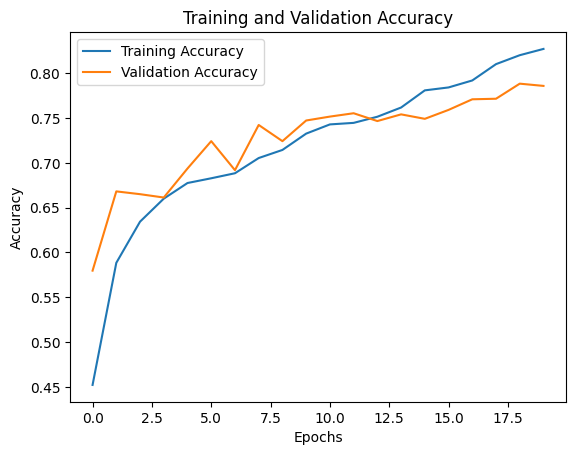

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

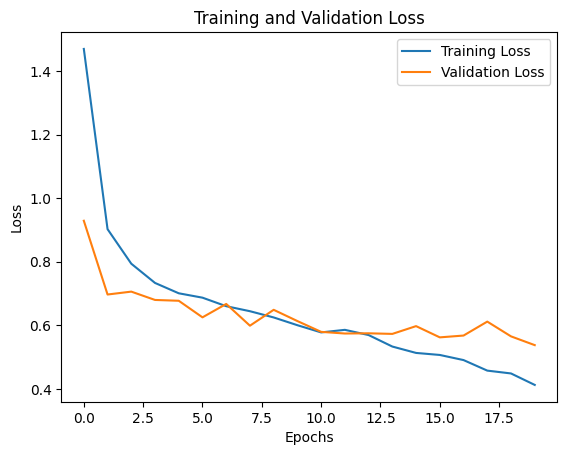

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = model.predict(validation_dataset)

y_pred

51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step


array([[9.7628832e-01, 2.3362374e-02, 1.5807673e-04, ..., 1.2195661e-05,
        5.4315515e-05, 6.4794309e-05],
       [3.4789903e-08, 7.8933958e-08, 6.8435389e-07, ..., 7.1795668e-08,
        1.9343189e-03, 7.8713085e-05],
       [9.9305588e-01, 6.9418265e-03, 1.0957235e-07, ..., 1.0846882e-07,
        9.9903434e-07, 1.9081067e-08],
       ...,
       [2.9855457e-07, 1.4050679e-08, 4.6773133e-05, ..., 1.6524554e-07,
        4.9094390e-04, 9.9946028e-01],
       [8.0904533e-04, 1.5601718e-04, 1.4165841e-01, ..., 8.5113233e-01,
        1.0445012e-03, 4.6449681e-04],
       [1.0205460e-07, 3.6400712e-11, 4.2459838e-08, ..., 2.9922870e-08,
        6.5255120e-02, 9.3474406e-01]], dtype=float32)

In [ ]:
pip install opencv-python

In [ ]:
import cv2

In [ ]:
np.argmax(y_pred[10])

7

In [ ]:
y_pred[10]

array([0.00300972, 0.00079132, 0.00119176, 0.16060558, 0.05642387,
       0.00068953, 0.15943462, 0.6178536 ], dtype=float32)

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [ ]:
#classes= ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
classes= [0,1,2,3,4,5,6,7]

In [ ]:
y_true = []
for images, labels in validation_dataset:
    y_true.extend(labels.numpy())

In [ ]:
cm=tf.math.confusion_matrix(labels=y_true,predictions=y_pred_labels)

In [ ]:
y_pred_labels

[0,
 4,
 0,
 5,
 3,
 3,
 0,
 4,
 7,
 0,
 6,
 0,
 4,
 2,
 3,
 0,
 0,
 3,
 1,
 2,
 1,
 4,
 4,
 1,
 4,
 0,
 0,
 1,
 0,
 7,
 1,
 3,
 5,
 7,
 1,
 0,
 1,
 6,
 5,
 2,
 5,
 5,
 1,
 3,
 5,
 5,
 4,
 2,
 0,
 6,
 2,
 6,
 7,
 5,
 3,
 0,
 5,
 1,
 0,
 3,
 5,
 1,
 3,
 6,
 1,
 3,
 5,
 7,
 5,
 0,
 6,
 3,
 3,
 6,
 6,
 0,
 4,
 4,
 7,
 3,
 4,
 1,
 3,
 0,
 6,
 5,
 3,
 4,
 2,
 3,
 3,
 4,
 0,
 3,
 7,
 0,
 1,
 1,
 4,
 0,
 3,
 0,
 3,
 0,
 7,
 5,
 7,
 5,
 2,
 6,
 2,
 5,
 6,
 2,
 0,
 1,
 6,
 1,
 0,
 6,
 7,
 6,
 3,
 1,
 5,
 6,
 4,
 6,
 5,
 0,
 3,
 2,
 3,
 5,
 2,
 5,
 7,
 5,
 1,
 7,
 6,
 1,
 7,
 4,
 6,
 1,
 5,
 6,
 7,
 6,
 0,
 5,
 3,
 7,
 6,
 5,
 6,
 1,
 3,
 4,
 0,
 1,
 7,
 2,
 0,
 1,
 4,
 4,
 0,
 0,
 5,
 3,
 2,
 3,
 2,
 4,
 6,
 7,
 4,
 3,
 4,
 3,
 0,
 0,
 4,
 5,
 3,
 2,
 7,
 7,
 4,
 4,
 7,
 2,
 7,
 3,
 4,
 1,
 4,
 5,
 2,
 5,
 6,
 0,
 5,
 0,
 6,
 2,
 3,
 2,
 5,
 7,
 6,
 7,
 3,
 2,
 4,
 7,
 3,
 7,
 6,
 6,
 6,
 3,
 6,
 1,
 1,
 4,
 3,
 6,
 6,
 2,
 3,
 3,
 3,
 1,
 1,
 0,
 7,
 0,
 0,
 0,
 4,
 3,
 0,
 2,
 2,
 5,
 4,
 6,


In [ ]:
import seaborn as sns

In [ ]:
# Evaluate the model correctly
loss, accuracy = model.evaluate(validation_dataset)  # Pass the validation_dataset directly

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.7854 - loss: 0.5497
Validation Loss: 0.5376513600349426
Validation Accuracy: 0.7858032584190369


Text(95.72222222222221, 0.5, 'Actual')

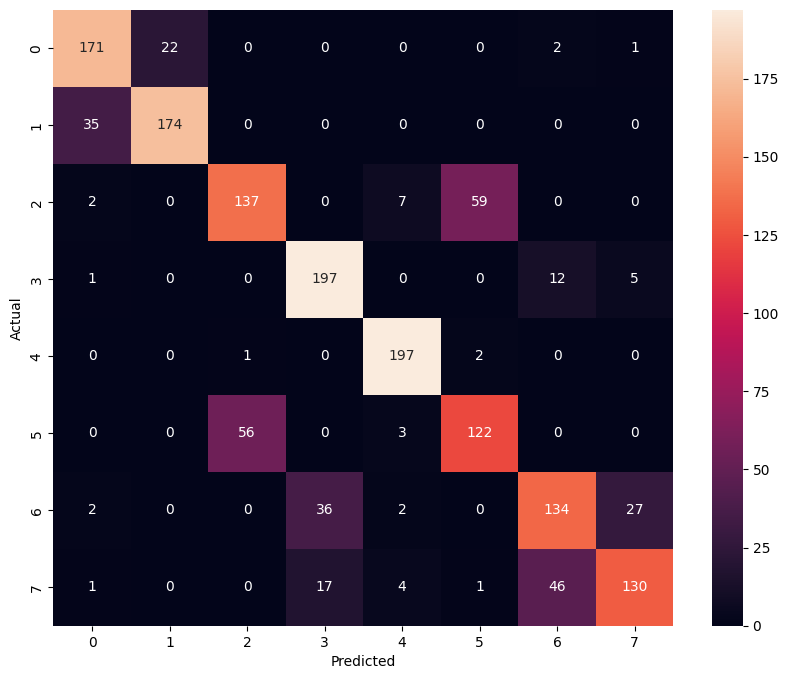

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_labels)
roc_auc = metrics.auc(fpr, tpr)

ValueError: multiclass format is not supported

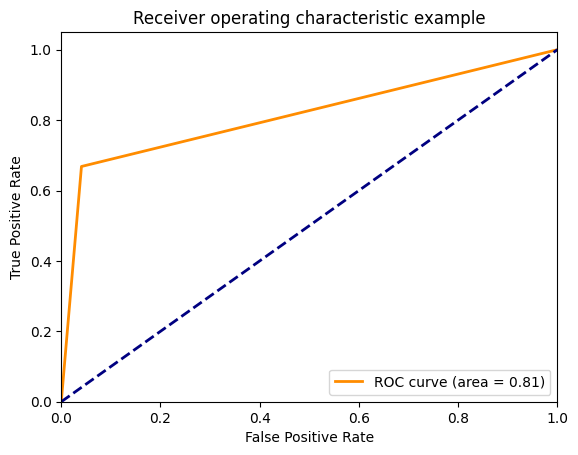

In [ ]:
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
n_classes = y_true_bin.shape[1]

# Binarize the predicted labels if they are not already in one-hot encoded format
y_pred_bin = label_binarize(y_pred_labels, classes=np.unique(y_true))


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
lw = 2  # Line width
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# You can repeat the plotting for other classes by changing the index in fpr, tpr, and roc_auc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# ... (Your existing code to create and train the model) ...

# Get true labels from the validation dataset
y_true = []
for images, labels in validation_dataset:
    y_true.extend(labels.numpy())

# Get predicted labels (argmax of predicted probabilities)
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred is your (1606, 8) array

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_labels)

print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7858032378580324


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

# ... (Your existing code to create, train the model, and get y_true and y_pred_labels) ...

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_labels)
print("Validation Accuracy:", accuracy)

# Calculate precision, recall, and sensitivity (macro average)
precision = precision_score(y_true, y_pred_labels, average='macro')
recall = recall_score(y_true, y_pred_labels, average='macro')
sensitivity = recall  # Sensitivity is the same as recall in binary classification

print("Precision (macro average):", precision)
print("Recall (macro average):", recall)
print("Sensitivity (macro average):", sensitivity)


# If you want to calculate metrics for each class individually:
precision_per_class = precision_score(y_true, y_pred_labels, average=None)
recall_per_class = recall_score(y_true, y_pred_labels, average=None)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)

Validation Accuracy: 0.7858032378580324
Precision (macro average): 0.7830922764699195
Recall (macro average): 0.7835653456187252
Sensitivity (macro average): 0.7835653456187252
Precision per class: [0.80660377 0.8877551  0.70618557 0.788      0.92488263 0.66304348
 0.69072165 0.79754601]
Recall per class: [0.87244898 0.83253589 0.66829268 0.91627907 0.985      0.67403315
 0.66666667 0.65326633]


In [ ]:
import cv2

In [ ]:
img=cv2.imread("/content/0a2ed767-ac9e-4922-b25c-9eb3dae85f66.jpg")

In [ ]:
img

array([[[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]]], dtype=uint8)

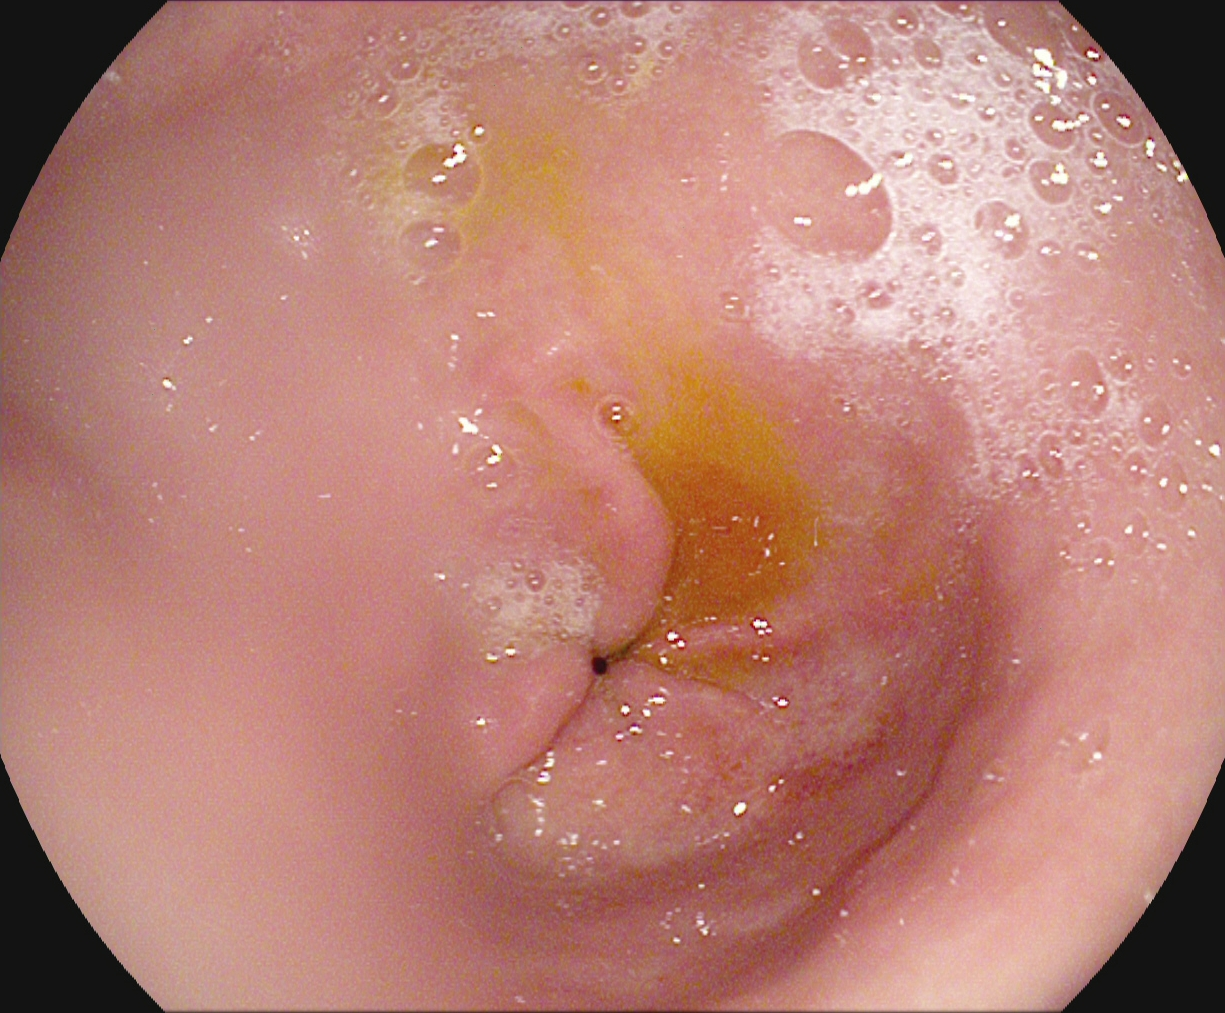

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
# Assuming 'model' is your trained Keras model
model.save('my_unet_model.h5')

In [ ]:
img.size

3722775

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_unet_model.h5')

In [ ]:
img = cv2.resize(img, (128, 128))
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img)
predicted_class = np.argmax(prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
predicted_class

0